In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime
from statsmodels.tsa.seasonal import STL
from prophet import Prophet
import statsmodels.api as sm 

D:\Anaconda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [8]:
df = pd.read_csv("C:\\Users\\Administrator\\Desktop\\CLASSDATA\\waterlevel.csv")
df1=df['Time (GMT)'].copy()
df1.to_string()
df2=df['Date'].copy()
df3=df2+" "+df1
final_df = df3.astype('datetime64')
df['fDates']=final_df

In [9]:
df 

,Date,Time (GMT),Predicted (ft),Preliminary (ft),Verified (ft),fDates
0,2022/01/01,00:00,1.817,-,2.82,2022-01-01 00:00:00
1,2022/01/01,00:06,1.805,-,2.80,2022-01-01 00:06:00
2,2022/01/01,00:12,1.789,-,2.82,2022-01-01 00:12:00
3,2022/01/01,00:18,1.771,-,2.77,2022-01-01 00:18:00
4,2022/01/01,00:24,1.749,-,2.73,2022-01-01 00:24:00
...,...,...,...,...,...,...
7435,2022/01/31,23:30,1.516,-,1.61,2022-01-31 23:30:00
7436,2022/01/31,23:36,1.570,-,1.66,2022-01-31 23:36:00
7437,2022/01/31,23:42,1.621,-,1.75,2022-01-31 23:42:00
7438,2022/01/31,23:48,1.670,-,1.76,2022-01-31 23:48:00


In [10]:
dates=pd.date_range("20220101",periods=31)
dates

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30', '2022-01-31'],
              dtype='datetime64[ns]', freq='D')

In [11]:
dist = pd.read_csv("C:\\Users\\Administrator\\Desktop\\CLASSDATA\\Earth-Moon Distance in 2022.csv")
dist

,22-Jan,22-Feb,22-Mar,22-Apr,22-May,22-Jun,22-Jul,22-Aug,22-Sep,22-Oct,22-Nov,22-Dec
0,358891,364505.0,369884,385224.0,396971,405761.0,405529,396267,381872.0,372859,370260.0,375504
1,358034,367859.0,372495,389078.0,399854,406191.0,403936,392680,378314.0,371277,371972.0,379455
2,359081,372442.0,376074,393000.0,402300,405806.0,401569,388607,374821.0,370134,374053.0,383348
3,361971,377865.0,380418,396732.0,404124,404498.0,398390,384109,371520.0,369468,376457.0,387087
4,366429,383668.0,385226,399994.0,405138,402182.0,394395,379305,368595.0,369356,379170.0,390626
5,372015,389381.0,390132,402511.0,405166,398819.0,389637,374397,366284.0,369901,382187.0,393943
6,378211,394576.0,394755,404044.0,404076,394443.0,384247,369667,364848.0,371207,385486.0,397015
7,384496,398911.0,398738,404412.0,401795,389180.0,378456,365474,364528.0,373341,389001.0,399794
8,390408,402145.0,401780,403517.0,398336,383262.0,372597,362213,365494.0,376301,392614.0,402202
9,395589,404146.0,403663,401349.0,393809,377030.0,367096,360259,367797.0,379993,396149.0,404118


In [12]:
plt.plot(dates,dist['22-']/100000,c='r')
plt.plot(final_df,df['Verified (ft)'])
plt.xticks(pd.date_range('2022-01-01','2022-01-31',10),rotation=70)
plt.show()

KeyError: '2022-01'

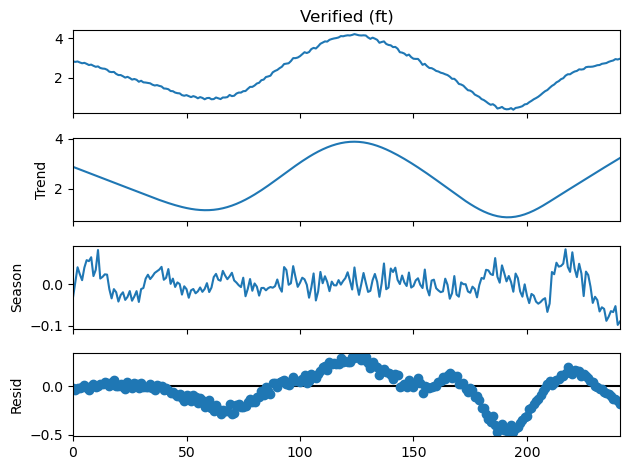

In [13]:
stl = STL(df.iloc[:242,4], period=31)
res = stl.fit()
fig = res.plot()


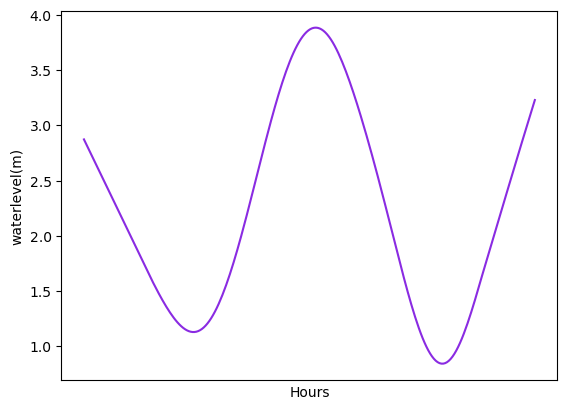

In [15]:
plt.plot(res.trend,c='blueviolet')
plt.xlabel('Hours')
plt.xticks([])
plt.ylabel('waterlevel(m)')
plt.show()

09:35:47 - cmdstanpy - INFO - Chain [1] start processing
09:35:49 - cmdstanpy - INFO - Chain [1] done processing


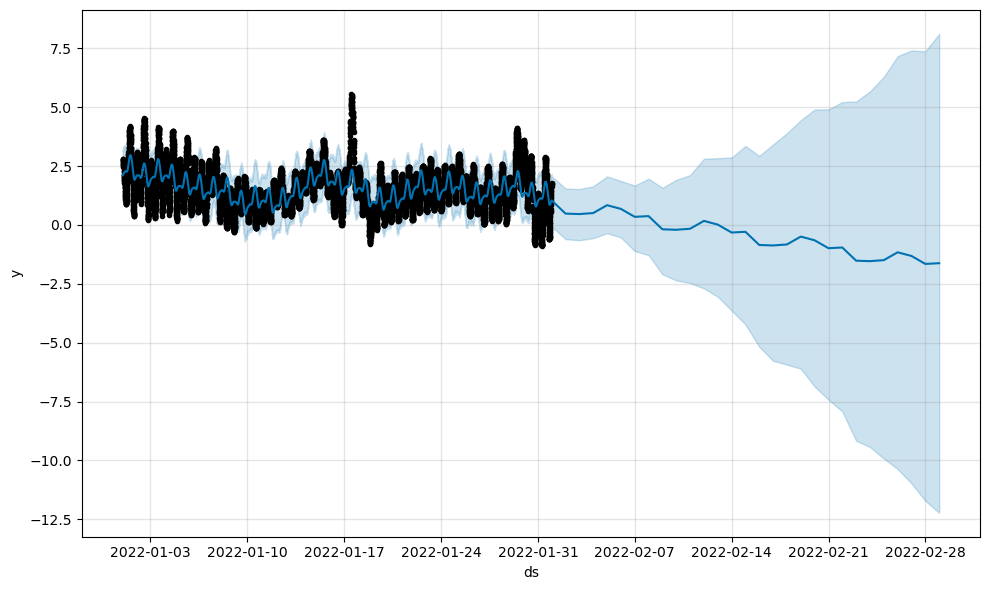

In [48]:
p = Prophet()
df['y']=df['Verified (ft)']
df['ds']=df['fDates']
p.fit(df)
future = p.make_future_dataframe(periods= 28)
forcast = p.predict(future)
p.plot(forcast)
plt.show()

In [52]:
feb_df=pd.read_csv('C:\\Users\\Administrator\\Desktop\\2022TIdesData\\FEB.csv')
feb_df['fDates'] = (feb_df['Date'] + " " + feb_df['Time (GMT)']).astype('datetime64')

,Date,Time (GMT),Predicted (ft),Preliminary (ft),Verified (ft),fDates
0,2022/02/01,00:00,1.760,-,1.80,2022-02-01 00:00:00
1,2022/02/01,00:06,1.801,-,1.86,2022-02-01 00:06:00
2,2022/02/01,00:12,1.839,-,1.88,2022-02-01 00:12:00
3,2022/02/01,00:18,1.874,-,1.91,2022-02-01 00:18:00
4,2022/02/01,00:24,1.906,-,1.97,2022-02-01 00:24:00
...,...,...,...,...,...,...
6715,2022/02/28,23:30,1.904,-,1.87,2022-02-28 23:30:00
6716,2022/02/28,23:36,1.924,-,1.91,2022-02-28 23:36:00
6717,2022/02/28,23:42,1.942,-,1.96,2022-02-28 23:42:00
6718,2022/02/28,23:48,1.956,-,1.99,2022-02-28 23:48:00


In [54]:
dates2=pd.date_range("20220201",periods=28)
dates2

DatetimeIndex(['2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04',
               '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08',
               '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12',
               '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28'],
              dtype='datetime64[ns]', freq='D')

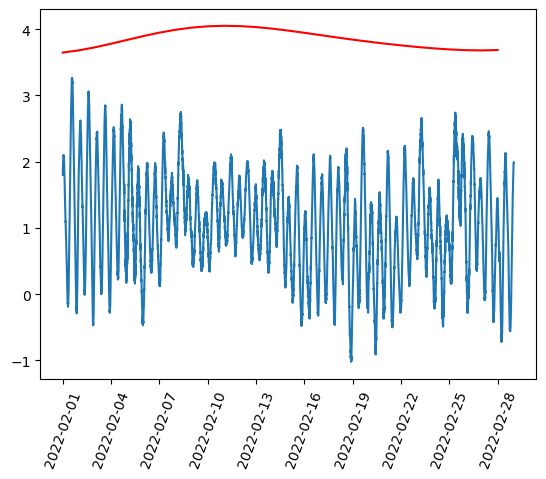

In [56]:
plt.plot(dates2,dist.iloc[:28,1]/100000,c='r')
plt.plot(feb_df['fDates'],feb_df['Verified (ft)'])
    plt.xticks(pd.date_range('2022-02-01','2022-02-28',10),rotation=70)
plt.show()

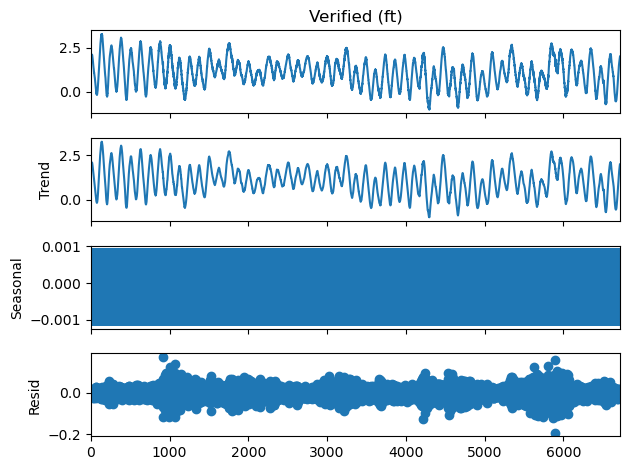

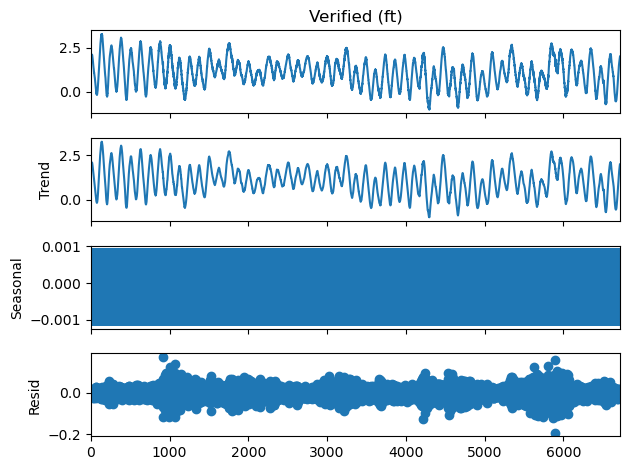

In [65]:
decomposition = sm.tsa.seasonal_decompose(feb_df['Verified (ft)'],period = 3)
decomposition.plot()